In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Salary_Data.csv")
print(df.head())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [3]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [4]:
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [6]:
print(X_tr.shape, X_te.shape, y_tr.shape, y_te.shape)
print(X_te)

(24, 1) (6, 1) (24,) (6,)
[[9.6]
 [4.9]
 [8.2]
 [5.3]
 [3.2]
 [3.7]]


In [7]:
from sklearn.preprocessing import StandardScaler
scl_x = StandardScaler()
X_tr = scl_x.fit_transform(X_tr)
X_te = scl_x.transform(X_te)
print(X_te)

[[ 1.5315002 ]
 [-0.09978613]
 [ 1.04558513]
 [ 0.03904675]
 [-0.68982587]
 [-0.51628477]]


In [8]:
scl_x.inverse_transform(X_te)

array([[9.6],
       [4.9],
       [8.2],
       [5.3],
       [3.2],
       [3.7]])

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(n_jobs = -1)
lr.fit(X_tr, y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [10]:
dir(lr)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [11]:
y_pred = lr.predict(X_te)

In [12]:
for true, false in zip(y_te, y_pred):
    print('True Value: {}\tPredicted Value: {}'.format(true, false))

True Value: 112635.0	Predicted Value: 115790.21011287419
True Value: 67938.0	Predicted Value: 71498.2780946286
True Value: 113812.0	Predicted Value: 102596.86866063082
True Value: 83088.0	Predicted Value: 75267.80422384098
True Value: 64445.0	Predicted Value: 55477.79204547593
True Value: 57189.0	Predicted Value: 60189.69970699142


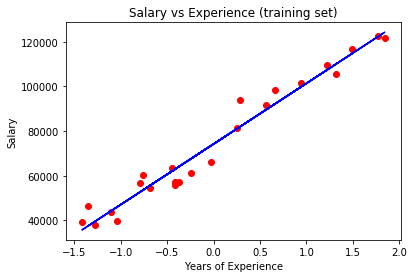

In [25]:
plt.scatter(X_tr, y_tr, color = 'red')
plt.plot(X_tr, lr.predict(X_tr), color = 'blue')
plt.title('Salary vs Experience (training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

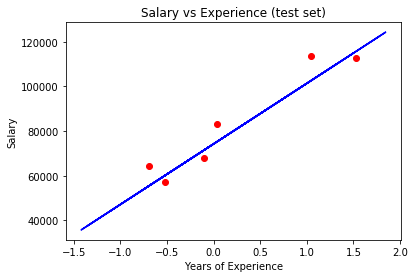

In [24]:
plt.scatter(X_te, y_te, color = 'red')
plt.plot(X_tr, lr.predict(X_tr), color = 'blue')
plt.title('Salary vs Experience (test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()